In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [ ]:
# !jupyter nbconvert Diploma.ipynb --Application.log_level=10 --to pdf 

# Описание
В ходе исследования были проверены 3 гипотезы связанные со сравнением технических показателей качества в группах удовлетворенных и неудовлетворенных пользователей **(Гипотеза №1)**, сравнением технических показателей качества в группе с наиболее популярными причинами недовольства связью и группе с менее популярными причинами **(Гипотеза №2)**, а также сравнением технических показателей качества в группах сформированных по категории недовольства качеством связи **(Гипотеза №3)**.<br><br>
В результате проведенного в рамках исследования анализа данных, а также проверки гипотез статистическими методами можно сделать следующие выводы:
* Исходная выборка демонстрирует значимые отличия в распределениях технических показателей только при разделении по ответам на первый вопрос **(Q1)**;
* Предложенные в опросе ответы на второй вопрос **(Q2)** различаются по популярности среди опрошенных, но не отличаются по распределениям технических показателей групп сформированных по ответам в графе Q2;
* Среди присутствующих в исходной таблице технических показателей нельзя выделить показатель выделяющийся по характеру распределения или по отличию в распределениях при проверки какой-либо из гипотез (за исключением суммарного трафика (Total Traffic(MB)), распределение показателя близко к равномерному при всех разделениях на подвыборки в данном исследовании).

Учитывая вышеизложенное заключим, что распределения технических показателей качества различимы только при сравнении групп удовлетворенных и нeудовлетворенных пользователей (Гипотеза №1) и однородны внутри группы неудовлетворенных пользователей (Гипотезы №2, №3 и анализ данных), разделение на выборки по признаку Q2 не выявило статистически значимой разницы у распределений, и, вероятно, опрошенные указывают причины своей неудовлетворенности качеством связи руководствуясь субъективными предпочтениями относительно составляющих сотовой связи.<br><br>
Это означает, что данные опроса разделяют всю совокупность текущих потребителей услуг компании «Мегафон» на две группы: удовлетворенные и неудовлетворенные ползователи.<br><br>
Исследование также выявило показатели качества вносящие вклад в оценку услуг потребителем (выделены жирным шрифтом, в скобочках указаны причины почему параметр не стоит относить к значимым показателям):
* Total Traffic(MB) - объем трафика передачи данных (распределение показателя близко к равномерному при всех разделениях на подвыборки в данном исследовании);
* **Downlink Throughput(Kbps)** - средняя скорость «к абоненту»;
* Uplink Throughput(Kbps) - средняя скорость «от абонента» (распределение не демонстрирует отличий при проверке гипотез);
* **Downlink TCP Retransmission Rate(%)** - частота переотправок пакетов «к абоненту»;
* Video Streaming Download Throughput(Kbps) - скорость загрузки потокового видео (параметр скоррелированный с Downlink Throughput(Kbps));
* **Video Streaming xKB Start Delay(ms)**;
* **Web Page Download Throughput(Kbps)**;
* **Web Average TCP RTT(ms)**.

В рамках анализа данных при проверке Гипотезы №2 исследовалась популярность вариантов ответов на вопрос Q2 в выборке недовольных пользователей, содержащей 1984 респондента. После чего проводилась группировка по категориям ответов и подсчет численности каждой категории.

| Вариант ответа  |Популярность варианта  | Категория | Численность категории   |
|-----------------|----------------------|----------|--------|
| 1 - недозвоны, обрывы при звонках                           | 648  | mobile                 |201  |
| 2 - время ожидания гудков при звонке                        | 184  | mobile                 |  |
| **3 - плохое качество связи в зданиях, торговых центрах, итп**  | **706**  | **mobile and internet**   |**763**   |
| 4 - медленный мобильный интернет                            | 626  |   internet             |200  |
| 5 - медленная загрузка видео                                | 222  | internet               |  |

В результате наиболее популярный ответ в графе Q2 это ответ **3**, наиболее многочисленная категория ответов - **mobile and internet** и две сопоставимые по численности категории **mobile** и **internet**. Для целей исследования использовались выборки сфомированные из категорий **mobile** и **internet**.<br><br>
Поскольку категорию **mobile and internet** формируют как комбинации ответов относящихся к категориям **mobile** и **internet** так и ответ **3** (который сам по себе является наиболее популярным вариантом ответа) можно заключить, что перефразирование варианта ответа **3**, придав ему более отчетливую принадлежность к категории, помогло бы избежать преобладания категории **mobile and internet** и распределить респондентов по более информативным категориям **mobile** и **internet**.<br><br>
Перефразирование варианта 3 может иметь форму разбиения данного варианта на 2 вопроса, например: 
1. Плохое качество мобильной связи в зданиях и торговых центрах;
2. Медленный мобильный интернет в зданиях и торговых центрах.

### Вступление 
В начале работы производится загрузка данных в датафрейм и поверхностный анализ данных.<br>
В первую очередь проводится визуализация наличия пропущенных значений в датафрейме и обзор типов данных содержащихся в колонках.

In [ ]:
df = pd.read_csv('megafon.csv')

In [ ]:
df


,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


In [ ]:
df.info()  # Данные колонок Q1 и Q2 представлены в строковом виде

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

пропущенные значения присутствуют в колонках с ответами на вопросы, если в колонке Q1 (ответ на первый вопрос) пропущенных 
значений незнаительное
количество, в Q2 (ответ на второй вопрос) пропущенных значений 80%, но это ожидаемо, так как при вынесении высокой оценки при  ответе на первый вопрос, второй вопрос не задавался

<AxesSubplot:>

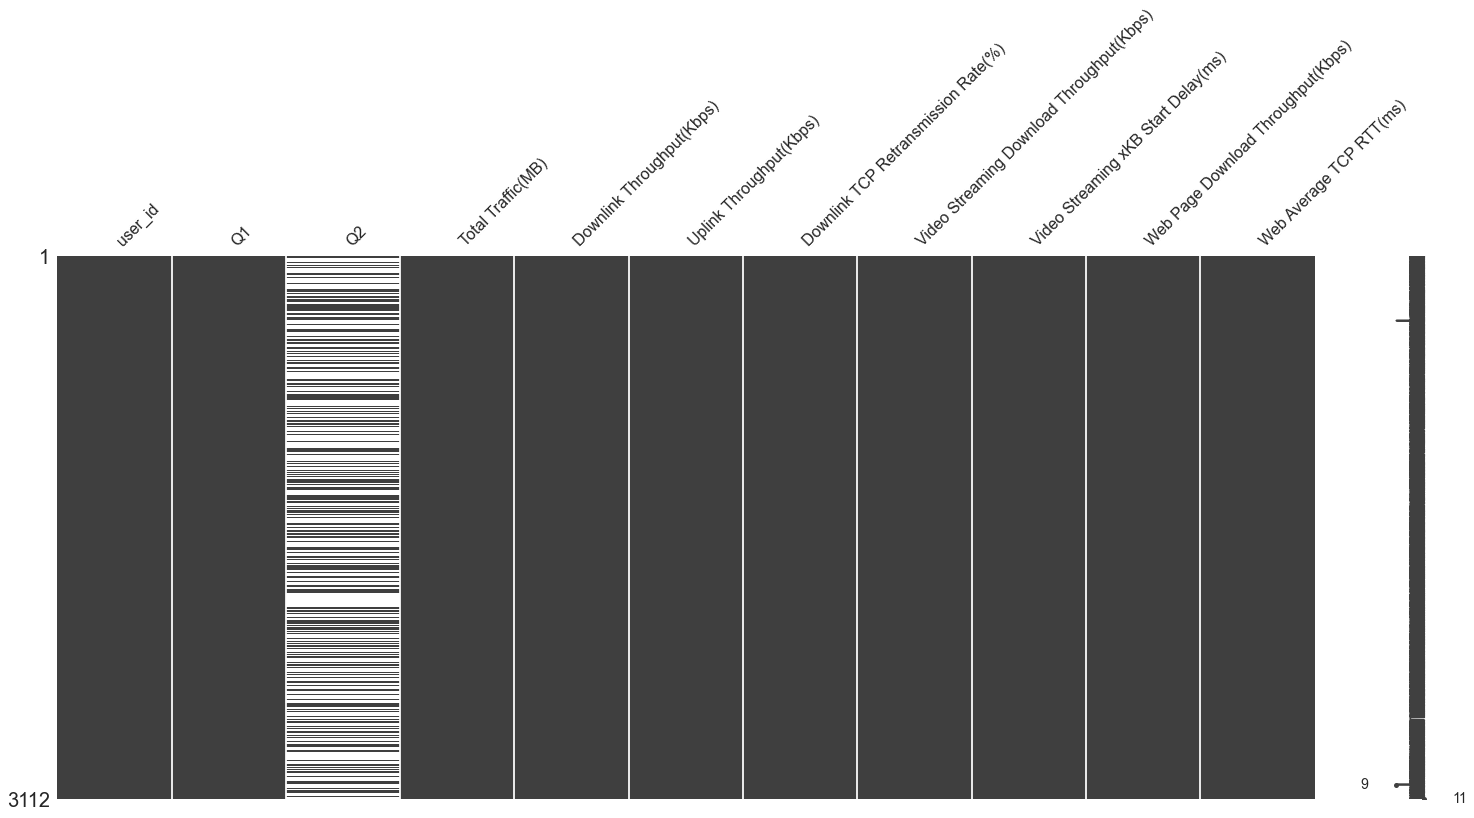

In [ ]:
msno.matrix(df)

Преобразование строкового типа данных колонке Q1, и филтрация неподходящих значений

In [ ]:
df.Q1 = pd.to_numeric(df.Q1, downcast = 'integer', errors = 'coerce')
df = df[df['Q1'] <= 10]
df['Q1'] = df['Q1'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3068 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3068 non-null   int64  
 1   Q1                                         3068 non-null   int32  
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3068 non-null   float64
 4   Downlink Throughput(Kbps)                  3068 non-null   float64
 5   Uplink Throughput(Kbps)                    3068 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3068 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3068 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3068 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3068 non-null   float64
 10  Web Average TCP RTT(ms) 

========Total Traffic(MB)=========
count    3068.000000
mean      405.490088
std       220.438816
min       100.026680
25%       213.165545
50%       363.245900
75%       572.169755
max       887.078270
Name: Total Traffic(MB), dtype: float64


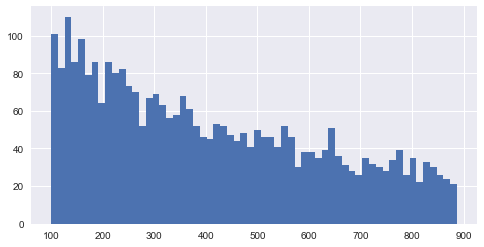

========Downlink Throughput(Kbps)=========
count     3068.000000
mean      2214.697203
std       2616.423431
min         13.260000
25%        653.387500
50%       1404.230000
75%       2823.645000
max      39817.640000
Name: Downlink Throughput(Kbps), dtype: float64


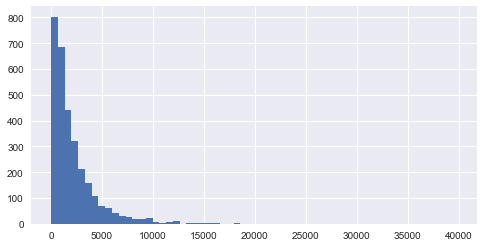

========Uplink Throughput(Kbps)=========
count    3068.000000
mean      170.433970
std       204.475626
min         6.110000
25%        70.355000
50%       119.210000
75%       210.610000
max      4141.850000
Name: Uplink Throughput(Kbps), dtype: float64


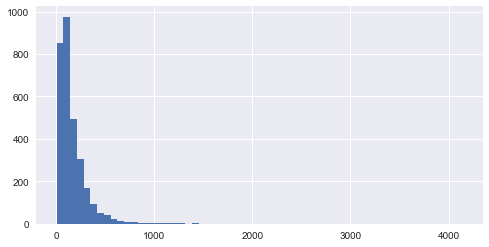

========Downlink TCP Retransmission Rate(%)=========
count    3068.000000
mean        1.834377
std         2.064389
min         0.050000
25%         0.720000
50%         1.300000
75%         2.250000
max        31.200000
Name: Downlink TCP Retransmission Rate(%), dtype: float64


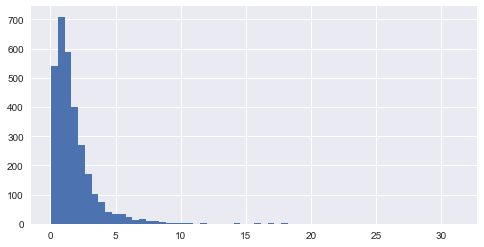

========Video Streaming Download Throughput(Kbps)=========
count     3068.000000
mean      5731.534831
std       5156.258909
min          0.000000
25%       2323.720000
50%       4434.310000
75%       7616.315000
max      58566.030000
Name: Video Streaming Download Throughput(Kbps), dtype: float64


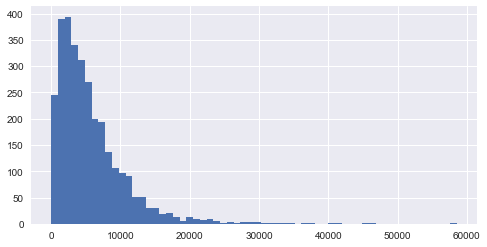

========Video Streaming xKB Start Delay(ms)=========
count     3068.000000
mean      2111.595828
std       1589.286566
min        239.000000
25%       1283.750000
50%       1673.000000
75%       2312.250000
max      21392.000000
Name: Video Streaming xKB Start Delay(ms), dtype: float64


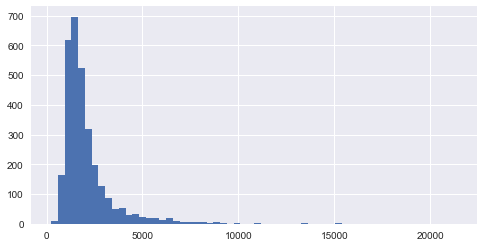

========Web Page Download Throughput(Kbps)=========
count     3068.000000
mean      2095.365375
std       2046.200827
min          0.000000
25%       1018.370000
50%       1671.240000
75%       2515.787500
max      35603.970000
Name: Web Page Download Throughput(Kbps), dtype: float64


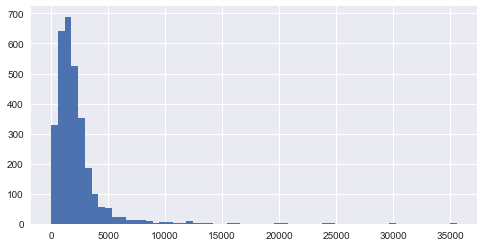

========Web Average TCP RTT(ms)=========
count    3068.000000
mean      194.199478
std       268.572595
min         0.000000
25%        74.000000
50%       118.000000
75%       206.000000
max      3471.000000
Name: Web Average TCP RTT(ms), dtype: float64


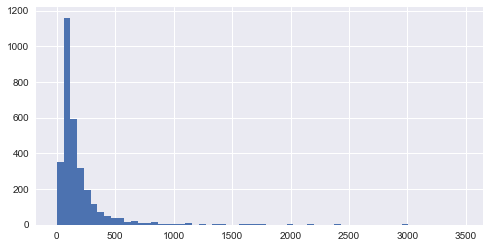

In [ ]:
# Далее получим описание распределений показателей качества представленных
# в опросе, а также визуализируем распределения с помощью гистограмм.

for i in df.columns[3:]:
    print('========' + i + '=========')
    print(df[i].describe())
    data = df[i]
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.hist(data, bins = 60)
    plt.show()

## Гипотеза №1
**Качество связи у абонентов поставивших высокий балл в графе Q1 лучше, чем у абонентов поставивших оценки ниже 9.**<br><br>
Для проверки этой гипотезы разделим данные на две выборки: выборка с высоким баллом в колонке Q1 (9, 10) и выборка с баллами от 0 до 8. В ходе проверки будут определены средние по выборкам значения показателей качества связи (остальные колонки в исходном датафрейме) с учетом доверительных интервалов, и их сравнение, в ходе которого будет выявлено имеется ли статистически значимая разница между средними показателями двух выборок и, если да, то превосходят ли средние значения выборки с высоким баллом аналогичные в выборке с низким баллом.<br><br>
Исследование этой гипотезы поможет понять целесообразность проведения опросов абонентов касательно качества связи. 

In [ ]:
# Формирование выборок для сравнения.

df_high = df[df['Q1'] >= 9]
df_low = df[df['Q1'] < 9]

In [ ]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 7 to 3109
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    1084 non-null   int64  
 1   Q1                                         1084 non-null   int32  
 2   Q2                                         0 non-null      object 
 3   Total Traffic(MB)                          1084 non-null   float64
 4   Downlink Throughput(Kbps)                  1084 non-null   float64
 5   Uplink Throughput(Kbps)                    1084 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        1084 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  1084 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        1084 non-null   int64  
 9   Web Page Download Throughput(Kbps)         1084 non-null   float64
 10  Web Average TCP RTT(ms) 

In [ ]:
df_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    1984 non-null   int64  
 1   Q1                                         1984 non-null   int32  
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          1984 non-null   float64
 4   Downlink Throughput(Kbps)                  1984 non-null   float64
 5   Uplink Throughput(Kbps)                    1984 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        1984 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  1984 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        1984 non-null   int64  
 9   Web Page Download Throughput(Kbps)         1984 non-null   float64
 10  Web Average TCP RTT(ms) 

В результате было сформировано 2 датафрейма **df_high** - выборка состоящая из респондентов поставивших высокую оценку при ответе на первый вопрос и **df_low** - выборка из респондентов, поставивших низкую оценку (ниже 9).

### Разведочный анализ
В качестве обзора данных используем метод наложения распределений из обех групп друг на друга для определения степени их различия на первый взгляд. Отметим средние значения на графиках.

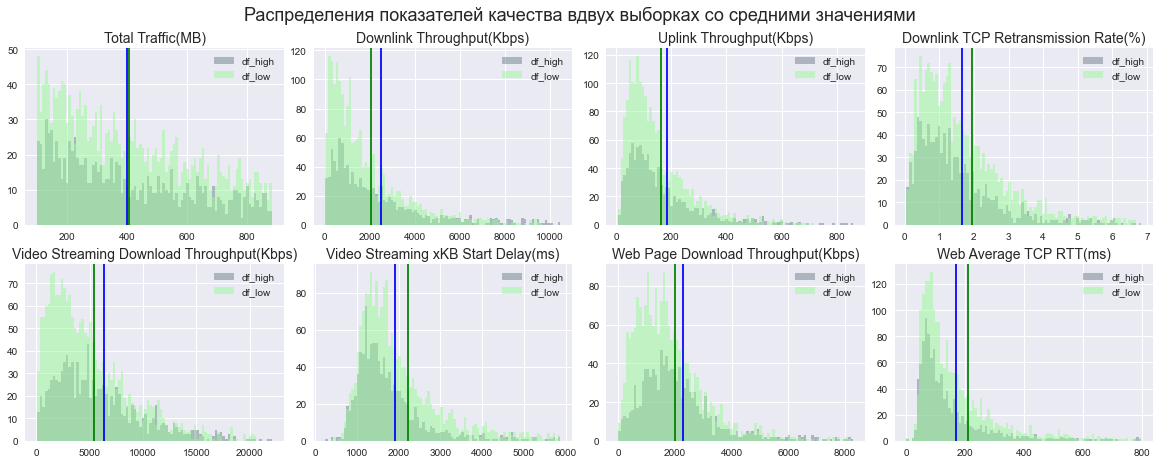

In [ ]:
feats = df_high.columns[3:].tolist()

fig, axs = plt.subplots(figsize = (16, 6), nrows = 2, ncols = 4, 
                        constrained_layout = True)

for ax, col in zip(axs.ravel(), feats):
    data_high = df_high[df_high[col] < df_high[col].mean()                # для наглядности отсечем выбросы распределений
        + 3*df_high[col].std()]
    
    data_low = df_low[df_low[col] < df_low[col].mean() 
        + 3*df_low[col].std()]
    
    _, bins, _ = ax.hist(data_high[col], label = 'df_high', bins = 90, 
                         color = 'slategray', alpha = 0.5)
    ax.hist(data_low[col], bins = bins, label = 'df_low', 
            color = 'palegreen', alpha = 0.5)
    ax.legend()
    ax.axvline(df_high[col].mean(), linestyle = '-', color = 'b')
    ax.axvline(df_low[col].mean(), linestyle = '-', color = 'g')
    ax.set_title(col, fontsize = 14)
# plt.savefig('EDA-h1', bbox_inches='tight')
fig.suptitle('Распределения показателей качества в\
двух выборках со средними значениями', fontsize = 18, y = 1.05)
plt.show()

Визуально графики распределений очень похожи, и средние значения расположены близко друг к другу, но различия в них все же есть,
далее исследуем является ли эта разница статистически значимой с помощью построения доверительных интервалов для средних значений выборок. <br><br>
Проверим на сколько распределения показателей качества связи в обеих группах близки к нормальному распределению при помощи графика QQ plot. График сравнивает квантили выборки и нормального распределения.<br><br>
Если два сравниваемых распределения похожи, точки на графике QQ будут приблизительно лежать на прямой y = x. Если распределения зависимы линейно, точки на графике будут приблизительно лежать на одной линии, но не обязательно на линии y = x.

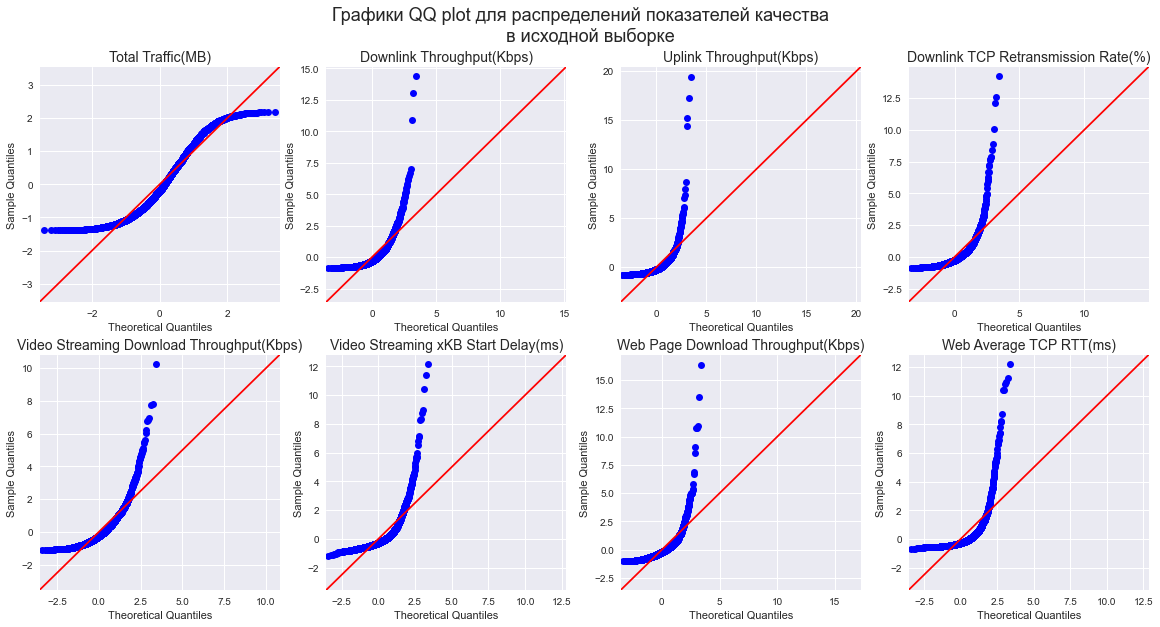

In [ ]:
feat_columns = df_high.columns[3:].tolist()
fig, axs = plt.subplots(figsize = (16, 8), nrows = 2, ncols = 4, 
    constrained_layout = True)

for ax, col in zip(axs.ravel(), feat_columns):
    data = df[col]    
    sm.qqplot(data, ax = ax, fit = True, line = '45')
    ax.set_title(col, fontsize = 14)

# for i, ax, col in zip(range(1, 17), axs.ravel(), feat_columns * 2):
#     if i <= 8:
#         data = df_high[col]
#         name = 'df_high'
#         sm.qqplot(data, ax = ax, fit = True)
#         ax.set_title(name + '\n' + col, fontsize = 12)
#     else:
#         data = df_low[col]
#         name = 'df_low'
#         sm.qqplot(data, ax = ax, fit = True)
#         ax.set_title(name + '\n' + col, fontsize = 12)
# plt.savefig('QQ-h1', bbox_inches='tight')        
fig.suptitle('Графики QQ plot для распределений показателей качества\n\
    в исходной выборке', fontsize = 18, y = 1.07)
plt.show()

Судя по графикам, ни одно из распределений не близко к нормальному, в данном случае нельзя использовать стандартные доверительные интервалы для нормального распределения.<br>
Для построения доверительных интервалов будет использоваться t-критерий Стьюдента — общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках.<br>

Доверительные интервалы для средних значений распределений будут рассчитаны по формуле:<br><br>
$$\bar{x} - t^* \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + t^* \cdot \frac{s}{\sqrt{n}}$$
В которой:<br>
t* – значение t-статистики, соответствующее выбранному уровню доверия;<br>
s - выборочное стандартное отклонение;<br>
n - количество объектов в выборке.<br>
Подберем значение t-статистики , соответствующее уровню доверия 95% (вероятности ошибки $\alpha=0.05$) при значении степеней свободы распределения $\gg120$: <br>
<div>
<img src="attachment:slide-8.jpg" width="500"/>
</div>
При заданных параметрах значение t = 1.96


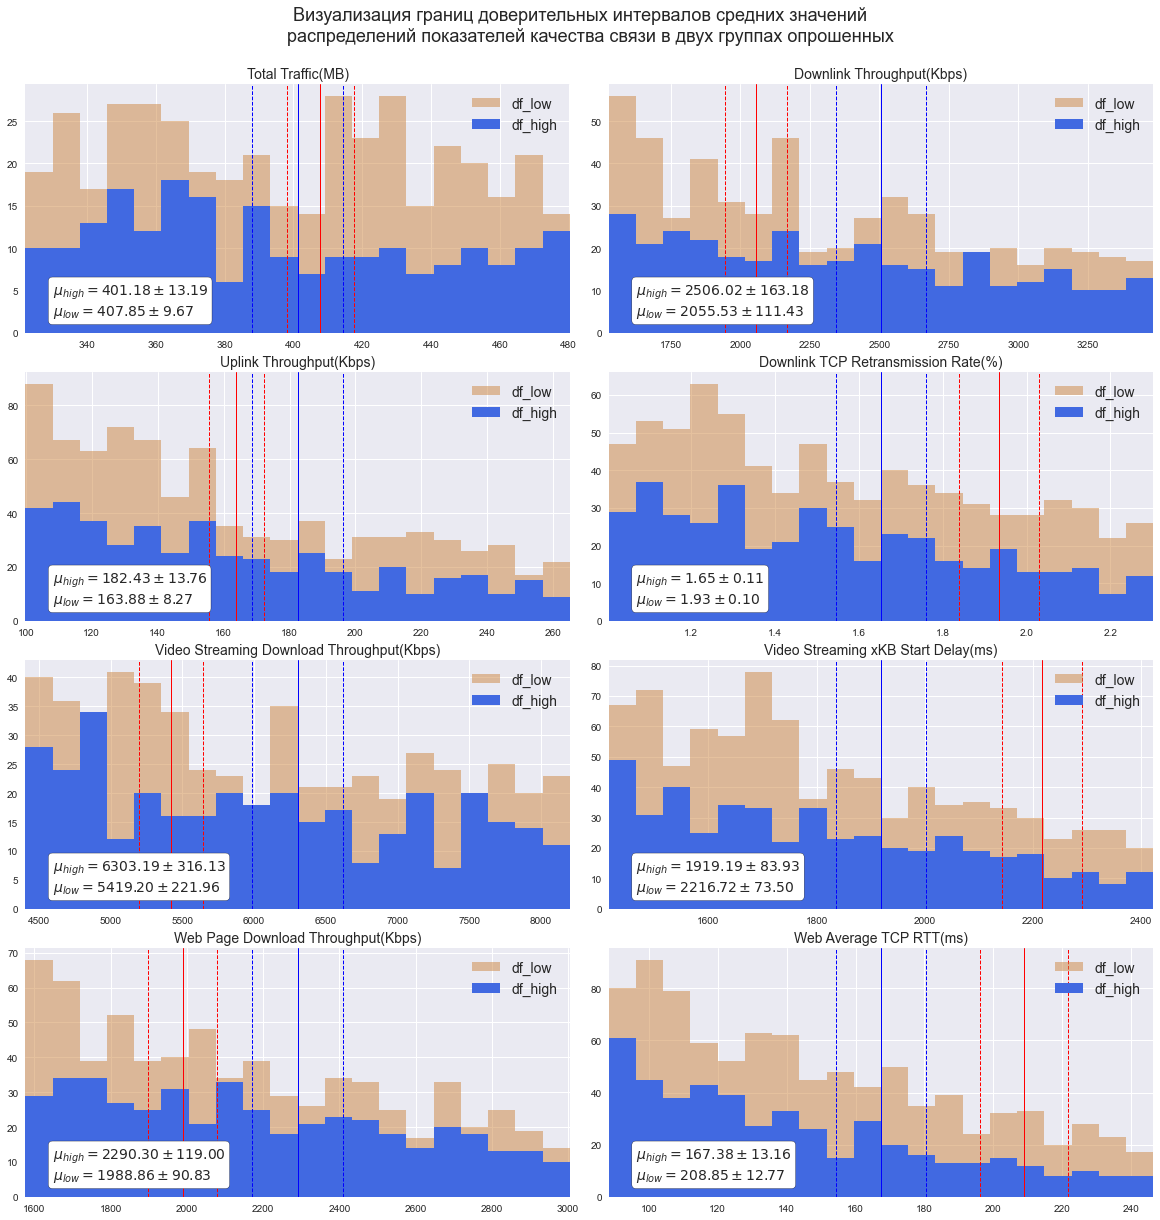

In [ ]:
t = 1.96 #значение t-статистики
n_high = 1084 #количество объектов в первой выборке
n_low = 1984 #количество объектов во второй выборке
feat_columns = df_high.columns[3:].tolist() 

fig, axs = plt.subplots(figsize = (16, 16), nrows = 4, ncols = 2, 
                        constrained_layout = True)

for ax, col in zip(axs.ravel(), feat_columns):
    s_high = df_high[col].std()
    conf_high = t * s_high / np.sqrt(n_high)
    mean_high = df_high[col].mean()
    
    s_low = df_low[col].std()
    conf_low = t * s_low / np.sqrt(n_low)
    mean_low = df_low[col].mean()

    ax.set_xlim(left = mean_high - 6*conf_high, 
                right = mean_high + 6*conf_high)
    
    _, bins, _ = ax.hist(df_low[col], label = 'df_low', 
                         alpha = 0.5, bins = 20, facecolor = 'peru',
                         range = (mean_high - 6*conf_high, 
                                  mean_high + 6*conf_high))
    
    ax.hist(df_high[col], label = 'df_high', alpha = 1, 
        bins = bins, facecolor = 'royalblue',
        range = (mean_high - 6*conf_high, mean_high + 6*conf_high))
    
    ax.axvline(x = mean_high - conf_high, color = 'b', 
               linewidth = 1, linestyle = '--')
    ax.axvline(x = mean_high + conf_high, color = 'b', 
               linewidth = 1, linestyle = '--')
    ax.axvline(x = mean_low - conf_low, color = 'r', 
               linewidth = 1, linestyle = '--')
    ax.axvline(x = mean_low + conf_low, color = 'r', 
               linewidth = 1, linestyle = '--')
    
    ax.axvline(x = mean_high, color = 'b', 
               linewidth = 1, linestyle = '-')
    ax.axvline(x = mean_low, color = 'r', 
               linewidth = 1, linestyle = '-')
    
    ax.legend(loc = 'upper right', fontsize = 14)
    textstr = '\n'.join((r'$\mu_{high}=%.2f\pm%.2f$' % (mean_high, conf_high),
        r'$\mu_{low}=%.2f\pm%.2f$' % (mean_low, conf_low)))

       
    props = dict(boxstyle = 'round', facecolor = 'white', alpha = 1)

    
    ax.text(0.05, 0.05, textstr, transform = ax.transAxes, fontsize = 14, 
        verticalalignment = 'bottom', bbox = props)
    ax.set_title(col, fontsize = 14)
# plt.savefig('stats-h1', bbox_inches='tight')    
fig.suptitle('Визуализация границ доверительных интервалов средних значений\n\
    распределений показателей качества связи в двух группах опрошенных',
    fontsize = 18, y = 1.05)
plt.show()

Судя по полученным средним значениям $\mu_{high}, \mu_{low}$ показателей качества в обеих выборках, имеется статистически значимая разница между средними значениями показателей качества выборок df_high и df_low у 
   **6-ти** из **8-ми** показателей, и их сравнение показало, что средние значения у выборки с высокой оценкой связи ($\mu_{high}$) превосходят аналогичные значения 
   в выборке с низкой оценкой качества связи ($\mu_{low}$) в соответствии с доверительным интервалом 95%, 
   это показатели: 
* Downlink Throughput(Kbps) - средняя скорость 'к абоненту', c разницей 451 Kbps;
* Downlink TCP Retransmission Rate(%) — частота переотправок пакетов 'к абоненту', c разницей 0.28% ;
* Video Streaming Download Throughput(Kbps) - скорость загрузки потокового видео, c разницей 884 Kbps; 
* Video Streaming xKB Start Delay(ms) - задержка старта воспроизведения видео, с разницей 297 ms; 
* Web Page Download Throughput(Kbps) - скорость загрузки web-страниц через браузер, c разницей 302 Kbps. 
* Web Average TCP RTT(ms) — пинг при просмотре web-страниц, c разницей 41 ms.


Результат сравнения свидетельствует о том, что 6 из 8-ми средних значений показателей качества двух выборок обладают статистически значимой разницей, и эта разница указывает на более высокое качество связи у выборки df_high, не смотря на то, что эта разница не велика. **Гипотеза №1** может потребовать дополнительной проверки.

### Bootstrap
В качестве дополнительного метода проверки Гипотезы №1 будет использоваться метод bootstrap примененный к разностям средних значений показателей качества двух выборок.<br>


Для определения разницы составим выборки показателей в размере **500** объектов каждой из групп методом bootstrap, получим разность средних значений, и количеством шагов **n = 3000**, затем визуализируем распределения разностей показателей с помощью гистограмм, распределения средних выборочных значений является нормальным (центральная предельная теорема).
На гистограммах будут отмечены границы доверительных интервалов для нормального распределения соответствующие **уровню доверия 95%**.

Производим необходимые инициации переменных, и запускаем цикл *bootstrap* 
по каждой колонке показателей качества для двух выборок, в результате будут 
получены **8** распределений разностей средних значений с количеством элементов 
**n = 3000**.  Распределения 
будут визуализированы с помощью гистограмм с отмеченными границами
доверительных интевалов, которые у нормального распределения соответствуют
2.5 и 97.5 перцентилям при **уровне доверия 95%**, что наглядно продемонстрирует
наличие или отсутствие разницы у генеральных совокупностей.

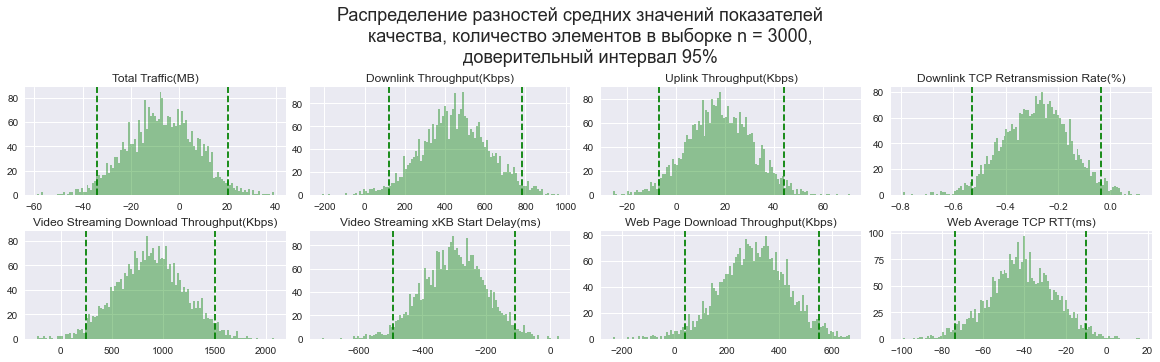

In [ ]:
feat_columns = df_high.columns[3:].tolist()

feat_names = [
    'total',
    'down_th',
    'up_th',
    'retr',
    'video_th',
    'video_delay',
    'web_th',
    'ping'
]

for name in feat_names:
    globals()['diff_' + name] = []

var_names = [
    diff_total,
    diff_down_th,
    diff_up_th,
    diff_retr,
    diff_video_th,
    diff_video_delay,
    diff_web_th,
    diff_ping
]

fig, axs = plt.subplots(figsize = (16, 4), nrows = 2, ncols = 4, 
                        constrained_layout = True)

for ax, col, list_var in zip(axs.ravel(), feat_columns, var_names):
    
    """Каждое распределение разностей показателей будет содержать 3000 
    элементов.  Ниже формирование выборки из 500 показателей качества 
    для двух выборок и дополнение распределения разностью средних из 
    выборок выше."""
   
    for i in range(3000): # 
        h = df_high[col].sample(500, replace = True)
        l = df_low[col].sample(500, replace = True)
        list_var.append(np.mean(h) - np.mean(l))
        
    ax.hist(list_var, bins = 120, color = 'g', alpha = 0.4)
    ax.set_title(col, fontsize = 12)
    ax.axvline(np.percentile(list_var, 2.5), 
        linestyle = '--', color = 'g')
    ax.axvline(np.percentile(list_var, 97.5), 
        linestyle = '--', color = 'g')
# plt.savefig('bootstrap-h1', bbox_inches='tight')
fig.suptitle('Распределение разностей средних значений показателей\n\
    качества, количество элементов в выборке n = 3000,\n\
    доверительный интервал 95%', fontsize = 18, y = 1.22)
plt.show()   
    

Проверка Гипотезы №1 методом bootstrap показала, что с **95% уверенностью** можно утверждать, что **6** из **8-ми** показателей качества демонстрируют наличие разницы в средних значениях среди выборок df_high и df_low, в пользу выборки df_high:
* показатели качества выше - положительная разница у показателей средняя скорость загрузки **Downlink Throughput(Kbps)**, загрузки видео **Video Streaming Download Throughput(Kbps)**, скорости загрузки веб-страниц **Web Page Download Throughput(Kbps)**;
* отрицательная разница у показателей частота переотправок пакетов **Downlink TCP Retransmission Rate(%)**, задержки воспроизведения видео **Video Streaming xKB Start Delay(ms)**, пинг **Web Average TCP RTT(ms)**.


Границы доверительных интервалов у вышеперечисленных распределений разностей показателей не содержат ноль, что свидетельствует о наличии ненулевой разницы значений.


## Заключение 
#### Гипотеза №1
**Качество связи у абонентов поставивших высокий балл в графе Q1 лучше, чем у абонентов поставивших оценки ниже 9.**
Проверка гипотезы двумя методами дала результат:
* Сравнение средних значений выборок **df_high** (респондентов поставивших высокий балл в графе Q1) и **df_low** (респондентов поставивших низкий балл в графе Q1) в границах доверительных интервалов с **уровнем доверия 95%** показало наличие статистически значимой разницы значений в **6-ти из 8-ми** показателей качества связи в пользу выборки **df_high** (показатели в ней выше);
* Визуализация распределений разностей средних значений выборок df_high и df_low методом *bootstrap* с **уровнем доверия 95%** показала наличие статистически значимой разницы значений **6-ти из 8-ми** показателей качества связи в пользу выборки **df_high** (показатели в ней выше).


В результате проверки Гипотезы №1 статистическими методами следует заключить, что Гипотеза №1 **верна**. Это означает, что выносимая оценка качества связи пользователями согласуется с реальными техническими показателями связи, и что проведение подобных опросов является целесообразным мероприятием.

## Гипотеза №2
Для формулировки второй гипотезы потребуется провести разведочный анализ для выявления тенденций.
### Разведочный анализ
Нам известны возможные варианты ответа на второй вопрос (колонка Q2) и их расшифровка:
* 1 - недозвоны, обрывы при звонках;
* 2 - время ожидания гудков при звонке
* 3 - плохое качество связи в зданиях, торговых центрах, итп;
* 4 - медленный мобильный интернет;
* 5 - медленная загрузка видео;
* 6 - затрудняюсь ответить;
* 7 - свой вариант.

Выборка **df_low** содержит варианты ответов респондентов поставивших низкий бал в графе Q1, это означает что данная выборка содержит ответы на вопрос Q2. Ниже выясним какой из вариантов ответов на вопрос Q2 является самым многочисленным.<br> Известно, что в графе Q2 может содержаться несколько вариантов ответа на вопрос, поэтому проведем поиск
вхождений каждого варианта во всех возможных комбинациях в графе Q2.

In [ ]:
figures = '12345'
answers = list(figures)
answers_count = {}
for fig in answers:
    answers_count[fig] = 0
    for ind in df_low['Q2'].value_counts().index:
        if fig in ind:
            answers_count[fig] += df_low['Q2'].value_counts().loc[ind]
        else:
            continue
    

In [ ]:
answers_count

{'1': 648, '2': 184, '3': 706, '4': 626, '5': 222}

Формирование датафрейма для визуализации преобладания численности вхождения причин в графу Q2 с помощью горизонтальной
столбчатой диаграммы, которая наилучшим образом выделит популярность ответов.

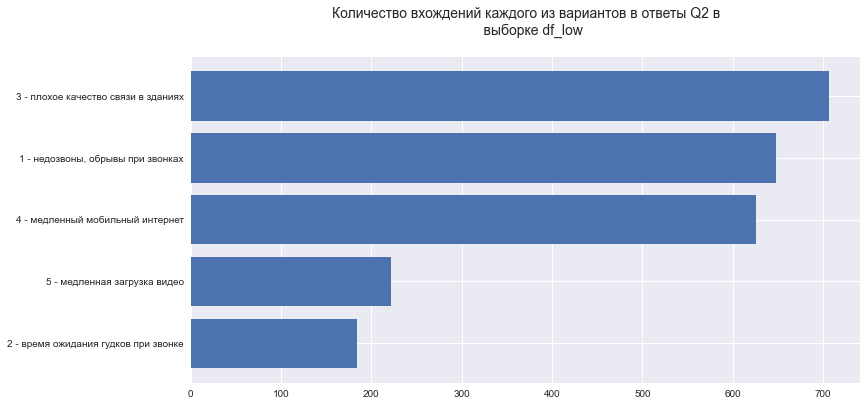

In [ ]:
answ_df = pd.DataFrame({'Answers' : [
    '1 - недозвоны, обрывы при звонках',
    '2 - время ожидания гудков при звонке',
    '3 - плохое качество связи в зданиях',
    '4 - медленный мобильный интернет',
    '5 - медленная загрузка видео'], 
    'Count' : list(answers_count.values())
    }
)

answ_df = answ_df.sort_values('Count', ascending = True)

fig, ax = plt.subplots(figsize = (12, 6))
 
plt.barh(y = answ_df['Answers'], width = answ_df['Count'])
plt.title('Количество вхождений каждого из вариантов в ответы Q2 в\n\
    выборке df_low', fontsize = 14, y = 1.05)

plt.show()

Самые многочисленные из вариантов ответа в колонке Q2:
* 1 - недозвоны, обрывы при звонках (648);
* 3 - плохое качество связи в зданиях, торговых центрах, итп (706);
* 4 - медленный мобильный интернет (626).

Учитывая то, что имеющиеся для анализа данные охватывают качество работы мобильного интернета и никак не затрагивают качество мобильной связи, в рамках текущего исследования мы не можем оценить зависимость оценки 1 от реальных технических показателей связи, поэтому тестируемая выборка будет формироваться по наличию причин 3 и 4.<br><br>
Формулировка Гипотезы №2
### Гипотеза №2
**Среди респондентов поставивших невысокий бал в графе Q1 наиболее низкими техническими показателями обладает группа указавшая причины 3 или 4 в графе Q2 (мобильный интернет в этой группе хуже, чем у остальной части выборки респондентов поставивших невысокий бал в графе Q1)**<br>
Проверка этой гипотезы укажет на наличие зависимости между указанной причиной в графе Q2 и техническими показателями связи у респондентов неудовлетворенных качеством связи. Подтверждение или опровержение поможет компании скорректировать дальнейшую стратегию работы с имеющимися пользователями, а так же список первостепенных задач по устранению неисправностей/уязвимостей в работе мобильных сетей.

Среди наиболее многочисленных причин неудовлетворенности связью отсутствуют варианты, указывающие на плохую скорость
воспроизведения видео, в связи с этим среди показателей для проверки Гипотезы №2:
* Downlink Throughput(Kbps) — средняя скорость 'к абоненту';
* Downlink TCP Retransmission Rate(%) — частота переотправок пакетов 'к абоненту';
* Web Page Download Throughput(Kbps) — скорость загрузки web-страниц через браузер;
* Web Average TCP RTT(ms) — пинг при просмотре web-страниц.

In [ ]:
# формирование датафреймов по вышеуказанным признакам

h2_columns = ['Q2', 'Downlink Throughput(Kbps)', 
              'Downlink TCP Retransmission Rate(%)',
              'Web Page Download Throughput(Kbps)', 
              'Web Average TCP RTT(ms)']

bad_internet_idxs = []
other_idxs = []

df_h2 = df_low.fillna('other')

for row, ind in zip(df_h2['Q2'], df_h2.index):
    if '3' in row or '4' in row:
        bad_internet_idxs.append(ind)
    else:
        other_idxs.append(ind)
        
df_bad_internet = df_h2[h2_columns].loc[bad_internet_idxs]
df_other = df_h2[h2_columns].loc[other_idxs]

In [ ]:
print('Количество элементов в выборке df_other:', len(df_other))
df_other['Q2'].value_counts()

Количество элементов в выборке df_other: 970


other              669
1                  168
7                   64
1, 2                22
2                   11
6                   10
5                    9
1, 5                 7
1, 2, 5              3
2, 5                 1
1, 2, 7              1
0, 1, 7              1
5, 6                 1
0, 05, 2, 27, 7      1
10                   1
0                    1
Name: Q2, dtype: int64

In [ ]:
print('Количество элементов в выборке df_bad_internet:', 
      len(df_bad_internet))
df_bad_internet['Q2'].value_counts()

Количество элементов в выборке df_bad_internet: 1014


3                   190
4                   170
1, 3                121
3, 4                 85
1, 3, 4              76
1, 4                 56
3, 4, 5              45
1, 2, 3              44
1, 3, 4, 5           40
4, 5                 30
1, 4, 5              27
1, 2, 3, 4, 5        27
1, 2, 3, 4           18
2, 3                 12
1, 2, 4              11
2, 3, 4              11
3, 5                  8
1, 2, 3, 5            4
1, 2, 4, 5            4
2, 4                  4
1, 4, 7               3
1, 3, 5               3
3, 4, 5, 7            3
2, 3, 4, 5            3
1, 3, 7               2
3, 4, 7               2
2, 4, 5               2
1, 3, 4, 7            2
3, 7                  2
1, 3, 4, 5, 7         2
1, 2, 3, 4, 5, 6      2
1, 2, 34              1
0, 3                  1
4, 7                  1
1, 2, 3, 4, 7         1
1, 2, 3, 7            1
Name: Q2, dtype: int64

В результате сформировано 2 примерно одинаковые по количеству элементов выборки:
* Тестируемая выборка: **df_bad_internet** содержащая респондентов указавших причину 3 - плохое качество связи в зданиях, торговых центрах, итп, или 4 - медленный мобильный интернет, с количеством объектов **1014**;
* Контрольная выборка: **df_other** содержащая респондентов в списке причин которых не содержится причин 3 и 4, с количеством объектов **970**.

### Bootstrap
В качестве метода проверки Гипотезы №2 будет использоваться метод bootstrap примененный к разностям средних значений показателей качества двух выборок.<br><br>

Для определения разницы составим выборки показателей в размере **500** объектов каждой из групп методом bootstrap, получим разность средних значений, и количеством шагов **n = 3000**, затем визуализируем распределения разностей показателей с помощью гистограмм.
На гистограммах будут отмечены границы доверительных интервалов для нормального распределения соответствующие **уровню доверия 95%**.

Производим необходимые инициации переменных, и запускаем цикл *bootstrap* 
по каждой колонке показателей качества для двух выборок, в результате будут 
получены **4** распределений разностей средних значений с количеством элементов 
**n = 3000**.  Распределения 
будут визуализированы с помощью гистограмм с отмеченными границами
доверительных интевалов, которые у нормального распределения соответствуют
2.5 и 97.5 перцентилям при **уровне доверия 95%**, что наглядно продемонстрирует
наличие или отсутствие разницы у генеральных совокупностей.

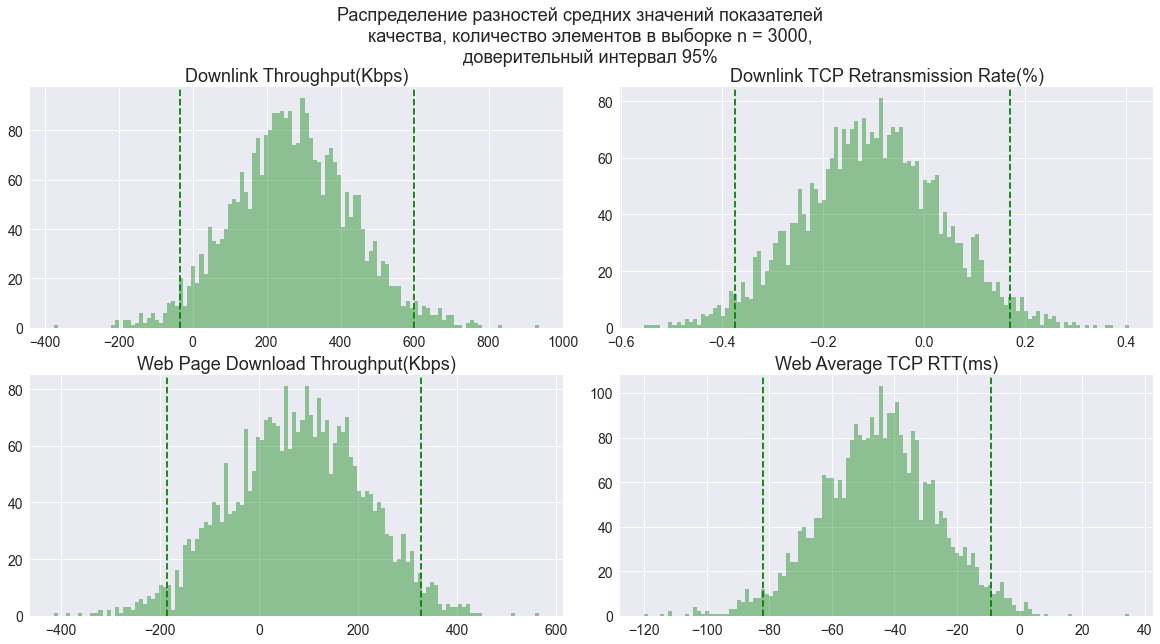

In [ ]:
feat_columns = h2_columns[1:]

h2_names = [
    'down_th',
    'retr',
    'web_th',
    'ping'
    ]

for name in h2_names:
    globals()['h2_diff_' + name] = []

var_names = [
    h2_diff_down_th,
    h2_diff_retr, 
    h2_diff_web_th,
    h2_diff_ping
]
    
fig, axs = plt.subplots(figsize = (16, 8), nrows = 2, ncols = 2, 
                        constrained_layout = True)

for ax, col, list_var in zip(axs.ravel(), feat_columns, var_names):
    
    """Каждое распределение разностей показателей будет содержать 3000 
    элементов.  Ниже формирование выборки из 500 показателей качества 
    для двух выборок и дополнение распределения разностью средних из 
    выборок выше."""
   
    for i in range(3000):
        b = df_bad_internet[col].sample(500, replace = True)
        o = df_other[col].sample(500, replace = True)
        list_var.append(np.mean(o) - np.mean(b))

    ax.hist(list_var, bins = 120, color = 'g', alpha = 0.4)
    ax.set_title(col, fontsize = 18)
    ax.tick_params(labelsize = 14)
    ax.axvline(np.percentile(list_var, 2.5), 
        linestyle = '--', color = 'g')
    ax.axvline(np.percentile(list_var, 97.5), 
        linestyle = '--', color = 'g')
# plt.savefig('bootstrap-h2', bbox_inches = 'tight')    
fig.suptitle('Распределение разностей средних значений показателей\n\
    качества, количество элементов в выборке n = 3000,\n\
    доверительный интервал 95%', fontsize = 18, y = 1.10)
plt.show()

## Заключение 
#### Гипотеза №2
**Среди респондентов поставивших невысокий бал в графе Q1 наиболее низкими техническими показателями обладает группа указавшая причины 3 или 4 в графе Q2 (мобильный интернет в этой группе хуже, чем у остальной части выборки респондентов поставивших невысокий бал в графе Q1)** <br><br>
Проверка Гипотезы №2 методом *bootstrap* **не выявила** статистически значимой разницы между средними значениями двух выборок **df_bad_internet** (тестируемая выборка содержащая респондентов указавших причину 3 - плохое качество связи в зданиях, торговых центрах, итп, или 4 - медленный мобильный интернет) и **df_other** (контрольная выборка содержащая респондентов в списке причин которых не содержится причин 3 или 4) ни одного из выбранных технических показателей качества при **уровне доверия 95%.**<br>

Границы доверительных интервалов **3-x из 4-x** распределений разностей средних содержат ноль, что не позволят сделать вывод о наличии статистически знаимой разницы значений.<br><br>
В результате проверки следует заключить, что Гипотеза №2 **не верна**. Это означает, что группа респондентов, указавших в графе Q2 причины 3 или 4 не обладает наихудшими техническими показателями качества связи. <br>



Исследование Гипотезы №2 было направлено на поиск зависимости между указанной причиной в графе Q2 и техническими показателями связи у респондентов неудовлетворенных качеством связи. Опровержение поможет компании скорректировать дальнейшую стратегию работы с имеющимися пользователями. Поиск первостепенных задач по устранению неисправностей/уязвимостей в работе мобильных сетей следует начать с разведочного анализа проведенного в текущем блоке, наиболее популярными вариантами ответа в графе Q2 являются:
* 1 - недозвоны, обрывы при звонках (648);
* 3 - плохое качество связи в зданиях, торговых центрах, итп (706);
* 4 - медленный мобильный интернет (626).

## Гипотеза №3
Для формулировки второй гипотезы потребуется провести разведочный анализ для выявления тенденций.
### Разведочный анализ
Для начала проверим распределения показателей качества связи на предмет взаимосвязи, для этого будут посчитаны коэффициенты корреляции показателей между собой и оформлены в виде визуализации Heatmap.

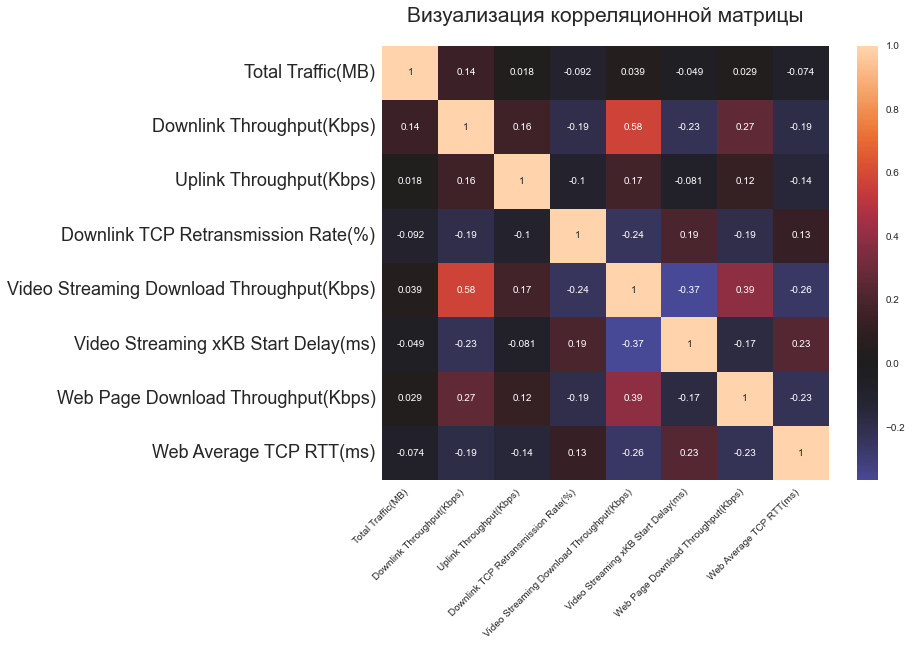

In [ ]:
plt.figure(figsize = (10, 8))

g = sns.heatmap(df[df.columns[3:]].astype(float).corr(), 
            center = 0, annot = True)
g.tick_params(axis = 'y', labelsize = 18)
g.tick_params(axis = 'x', labelsize = 10)

plt.setp(g.xaxis.get_majorticklabels(), rotation = 45, ha = "right")
# plt.savefig('corr-h3', bbox_inches = 'tight')
plt.title('Визуализация корреляционной матрицы', y = 1.04, size = 21);

Заметная значимость по шкале Чеддока - при коэффициенте корреляции от 0.5 по модулю и выше отмечается только у одной пары показателей, это **Downlink Throughput(Kbps)** (скорость загрузки) и **Video Streaming Download Throughput(Kbps)** (скорость загрузки видео) с коэффициентом 0.58.

Далее исследуем взаимосвязи путем построения диаграмм рассеивания для каждой из пар показателей, с цветовой градацией ответов в графе Q1:

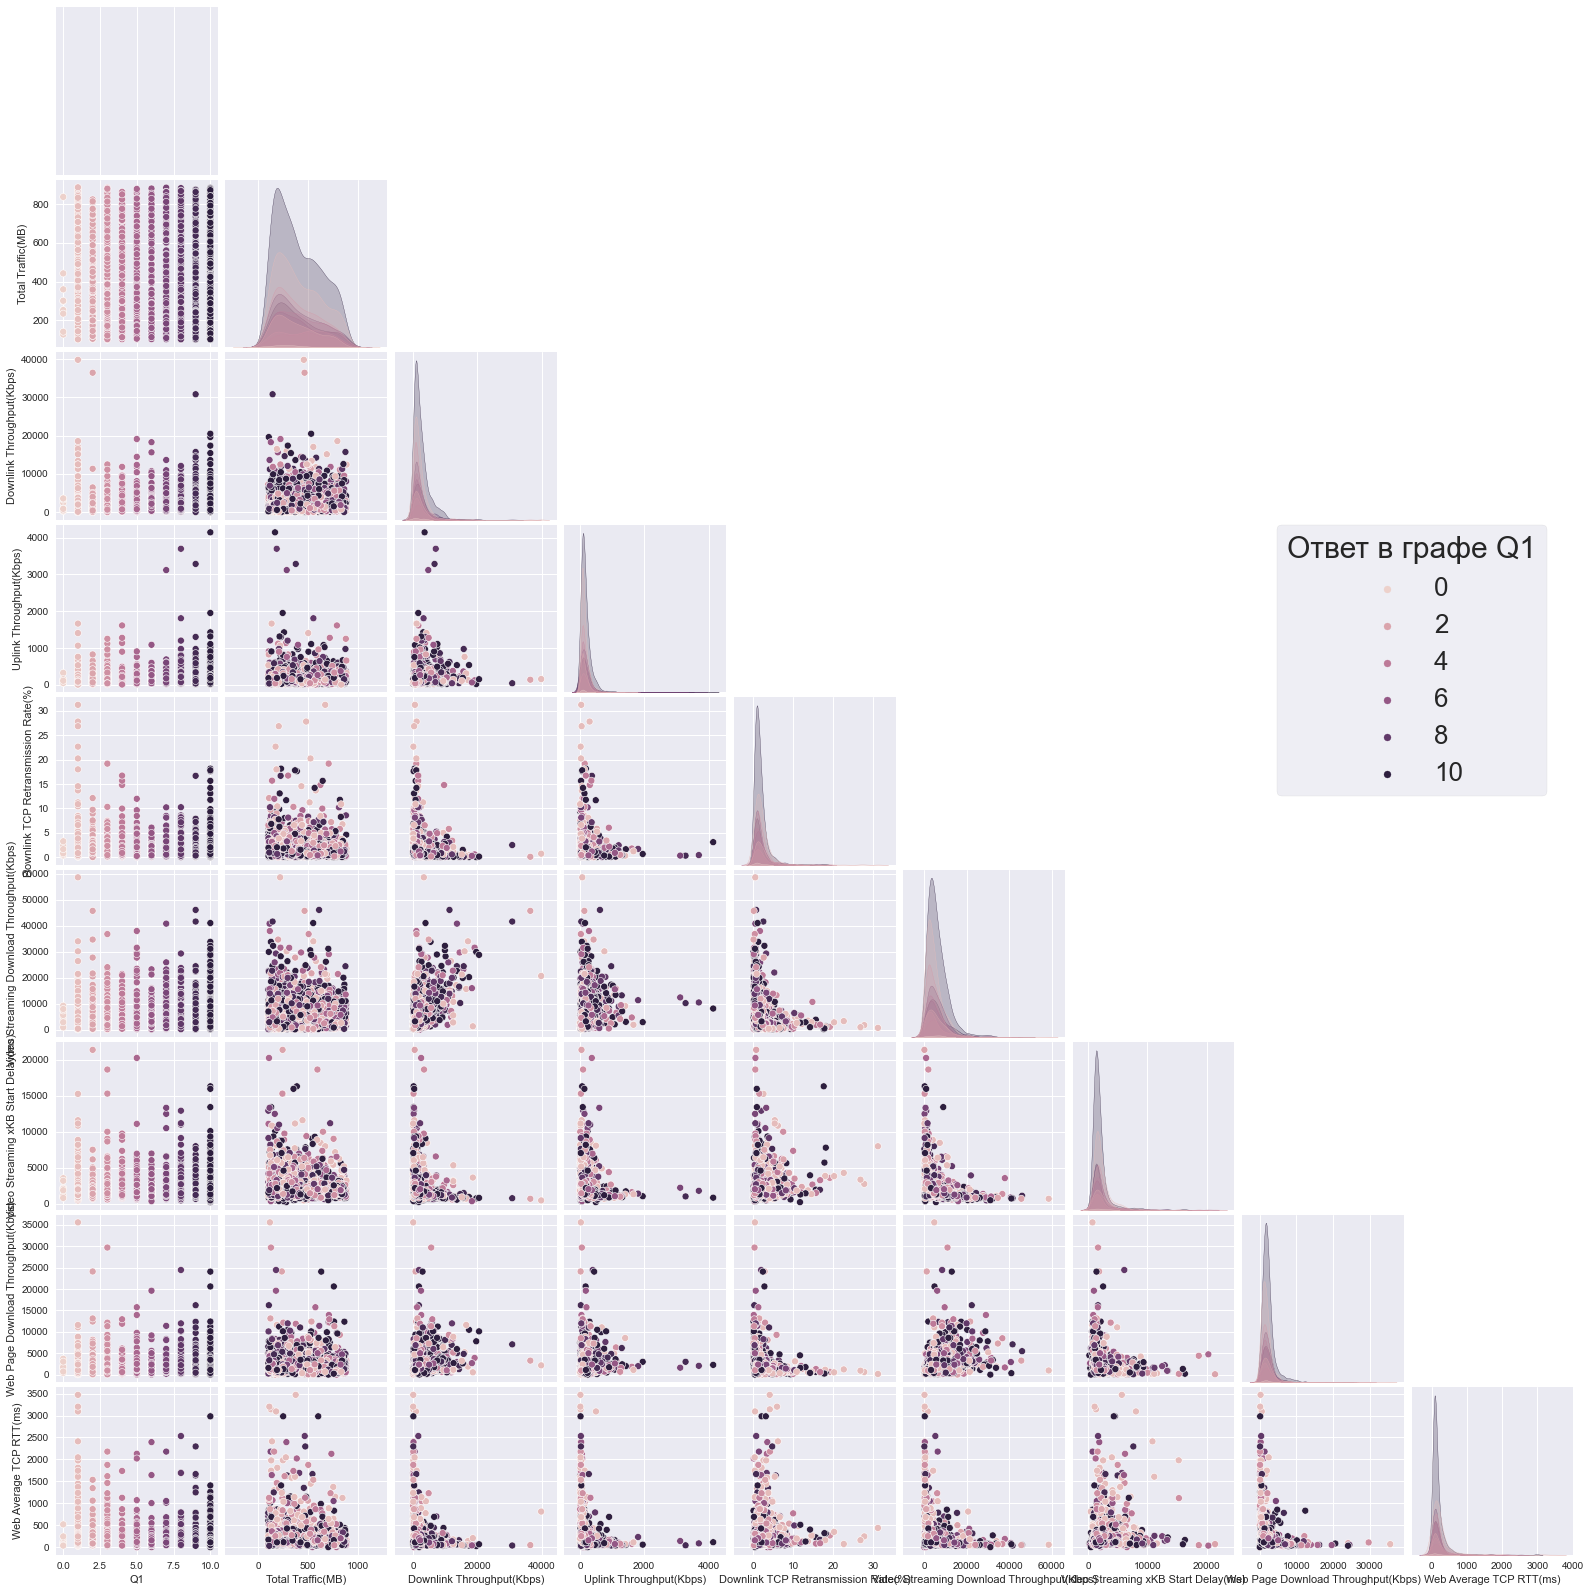

In [ ]:
variables = [
    'Q1', 
    'Total Traffic(MB)', 
    'Downlink Throughput(Kbps)',
    'Uplink Throughput(Kbps)', 
    'Downlink TCP Retransmission Rate(%)',
    'Video Streaming Download Throughput(Kbps)',
    'Video Streaming xKB Start Delay(ms)',
    'Web Page Download Throughput(Kbps)', 
    'Web Average TCP RTT(ms)'
]

g = sns.pairplot(df[df['Q1'] <= 10], hue = 'Q1', vars = variables, corner = True)
g._legend.remove()
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles = handles, labels = labels, loc = (.8, .5), fontsize = 28, 
    frameon = True, title = 'Ответ в графе Q1', title_fontsize = 32);
# g.savefig("pairplot-h3.png", bbox_inches = 'tight');

Похоже, что на диаграммах нет областей концентрации по типу варианта ответа в графе Q1, объекты с различными вариантами ответа распределены хаотично.

В данном блоке продолжим исследование на выборке df_low (выборке респондентов неудовлетворенных качеством связи).<br>

Для целей текущего блока заменим ответы в графе Q2 на категории:

| Вариант ответа                                              | Категория           |
|:------------------------------------------------------------:|:--------------------:|
| 1 - недозвоны, обрывы при звонках                           | mobile              |
| 2 - время ожидания гудков при звонке                        | mobile              |
| 3 - плохое качество связи в зданиях, торговых центрах, итп  | mobile and internet |
| 4 - медленный мобильный интернет                            | internet            |
| 5 - медленная загрузка видео                                | internet            |
| 6 - затрудняюсь ответить                                    | other               |
| 7 - свой вариант                                            | other               |
| Nan                                                         | no answer           |

Сформируем датафрейм путем заполнения пропущеных значений и фильтрации данных, для этого возьмем все колонки датафрейма
**df_low** кроме колонки user_id, заполним пропущенные значения колонки Q2 строкой *no answer*, затем удалим комбинации из
вариантов ответов в графе Q2, имеющих распространенность в датафрейме менее 0.5%.

In [ ]:

df_h3 = df_low[df_low.columns[1:]]
df_h3.fillna('no answer', inplace = True)
answ = df_h3['Q2'].value_counts()[
    df_h3['Q2'].value_counts(normalize = True) > 0.005
]

df_h3 = df_h3[df_h3['Q2'].isin(answ.index.values)]

In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 3111
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         1907 non-null   int32  
 1   Q2                                         1907 non-null   object 
 2   Total Traffic(MB)                          1907 non-null   float64
 3   Downlink Throughput(Kbps)                  1907 non-null   float64
 4   Uplink Throughput(Kbps)                    1907 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        1907 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  1907 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        1907 non-null   int64  
 8   Web Page Download Throughput(Kbps)         1907 non-null   float64
 9   Web Average TCP RTT(ms)                    1907 non-null   int64  
dtypes: float64(6), int32(1),

In [ ]:
df_h3['Q2'].value_counts()     

no answer        669
3                190
4                170
1                168
1, 3             121
3, 4              85
1, 3, 4           76
7                 64
1, 4              56
3, 4, 5           45
1, 2, 3           44
1, 3, 4, 5        40
4, 5              30
1, 2, 3, 4, 5     27
1, 4, 5           27
1, 2              22
1, 2, 3, 4        18
2, 3              12
2, 3, 4           11
1, 2, 4           11
2                 11
6                 10
Name: Q2, dtype: int64

In [ ]:
def categorize_answers(ans):
    
    """Функция заменяет числовой вариант ответа или их комбинацию
    текстовой категорией как указано в таблице из описания выше"""
    
    if len(ans) == 1:
        if ans == '1' or ans == '2':
            return 'mobile'
        elif ans == '3':
            return 'mobile and internet'
        elif ans == '4' or ans == '5':
            return 'internet'
        elif ans == '6' or ans == '7':
            return 'other'
        else:
            return 'no answer'
    else:
        if ans == 'no answer':
            return ans
        elif ('1' in ans or '2' in ans) and (not any(i in ans for i in '34567')):
            return 'mobile'
        elif ('4' in ans or '5' in ans) and (not any(i in ans for i in '12367')):
            return 'internet'
        elif ('6' in ans or '7' in ans) and (not any(i in ans for i in '12345')):
            return 'other'
        else:
            return 'mobile and internet'

In [ ]:
df_h3['Q2'] = df_h3['Q2'].apply(categorize_answers)

В результате имеем следующее распределение категорий в графе Q2:

In [ ]:
df_h3['Q2'].value_counts() 

mobile and internet    763
no answer              669
mobile                 201
internet               200
other                   74
Name: Q2, dtype: int64

Для построения гистограмм распределения признаков с учетом категорий в графе Q2 будут использоваться показатели выделеные жирным шрифтом, в скобках указаны причины по которым параметр был исключен из анализа:

* **Q2**;
* Total Traffic(MB) (является одинаковым у выборок и имеет равномерное распределение);
* **Downlink Throughput(Kbps)**;
* Uplink Throughput(Kbps) (средние показатели не различаются у выборок);
* **Downlink TCP Retransmission Rate(%)**;
* Video Streaming Download Throughput(Kbps) (скоррелированный с Downlink Throughput(Kbps));
* **Video Streaming xKB Start Delay(ms)**;
* **Web Page Download Throughput(Kbps)**;
* **Web Average TCP RTT(ms)**.

В блоке с исследованием Гипотезы №1 стало известно, что распределения показателей качества визуально близки к нормальному,
но имеют ярко выраженную ассиметрию - пики распределений смещены в сторону нуля. Здесь, для более наглядной визуализации
гистограмм, воспользуемся правилом трех сигм для отсечения выбросов распределений, поскольку все распределения в качестве границы слева имеют ноль, обозначим только правую границу для распределений.

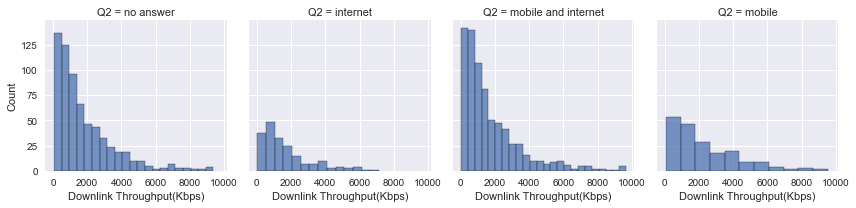

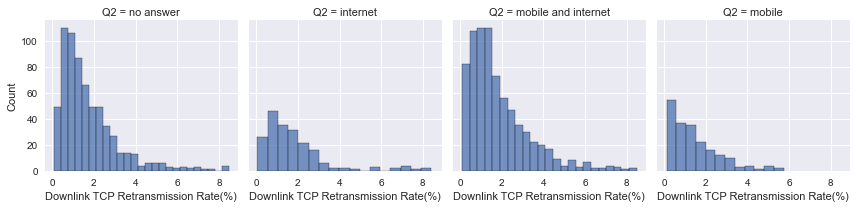

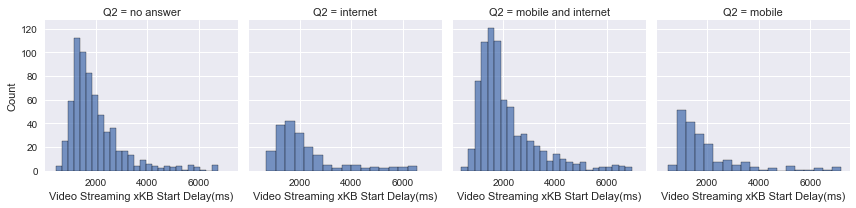

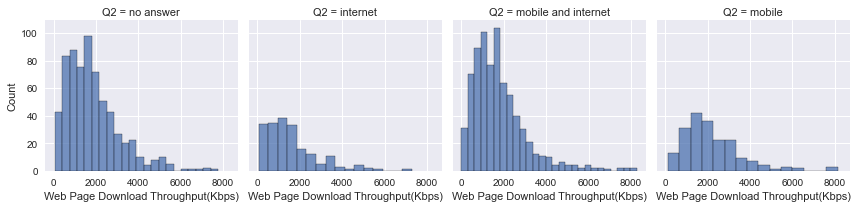

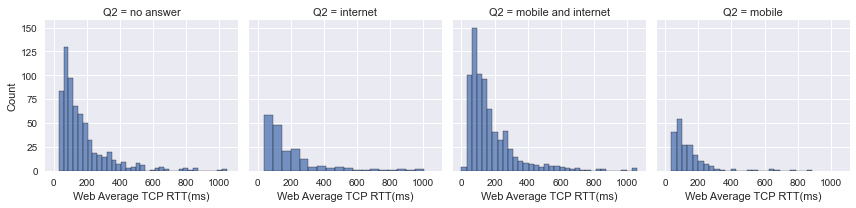

In [ ]:
feat_list = [
    'Downlink Throughput(Kbps)',
    'Downlink TCP Retransmission Rate(%)',
    'Video Streaming xKB Start Delay(ms)',
    'Web Page Download Throughput(Kbps)',
    'Web Average TCP RTT(ms)'
]

for col in feat_list:
    df_h3[col] = df_h3[df_h3[col] < df_h3[col].mean() \
        + 3*df_h3[col].std()\
        ][col]
    
for col in feat_list:
    g = sns.FacetGrid(df_h3[df_h3['Q2'] != 'other'], col = 'Q2')  # Уберем группу с категорией other т.к. она 
                                                                  # является самой малочисленной.

    g.map(sns.histplot, col)
#     g.savefig(f'hist-{col}-h3.png')

Визуализация распределений показателей качества связи в виде гистограмм распределенных по категориям графы Q2 не указывает на наличие взаимосвязи или тенденций в имеющихся данных, результирующие распределения параметров имеют схожий характер во всех четырех категориях.

Для целей текущего исследования воспользуемся разделением исходного датафрейма с помощью колонки **Total Traffic(MB)** - суммарный объем трафика передачи данных за неделю перед проведением опроса, после чего отследим соотношение довольных и недовольных пользователей в этих четырех группах по оценке в графе Q1: **оценка 9 и выше** - удовлетворенный пользователь, **оценка ниже 9** будет означть неудовлетворенного пользователя. Разобъем весь объем данных на 4 группы, границами для разбиения послужат 25-й, 50-й и 75-й перцентили:
* Группа с низким трафиком - **lowest_traffic** (0-й - 25-й перцентиль);
* Группа с трафиком ниже среднего - **low_avg_traffic** (25-й - 50-й перцентиль);
* Группа с трафиком выше среднего - **lowest_traffic** (50-й - 75-й перцентиль);
* Группа с высоким трафиком - **lowest_traffic** (75-й - 100-й перцентиль).

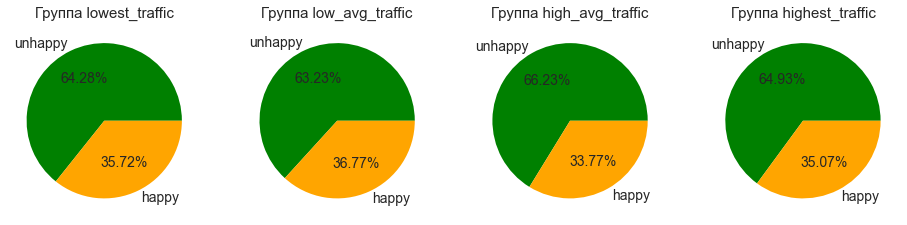

In [ ]:
df['Q1_cat'] = df['Q1'].apply(lambda x: 'happy' if x > 8 else 'unhappy')

perc_25 = np.percentile(df['Total Traffic(MB)'], 25)
perc_50 = np.percentile(df['Total Traffic(MB)'], 50)
perc_75 = np.percentile(df['Total Traffic(MB)'], 75)

lowest_traffic = df[df['Total Traffic(MB)'] <= perc_25]['Q1_cat']\
    .value_counts()
    
low_avg_traffic = df[(df['Total Traffic(MB)'] > perc_25) 
    & (df['Total Traffic(MB)'] <= perc_50)]['Q1_cat']\
    .value_counts()
    
high_avg_traffic = df[(df['Total Traffic(MB)'] > perc_50) 
    & (df['Total Traffic(MB)'] <= perc_75)]['Q1_cat']\
    .value_counts()
    
highest_traffic = df[df['Total Traffic(MB)'] > perc_75]['Q1_cat']\
    .value_counts()

fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 1)

axs[0].pie(lowest_traffic, 
           labels = lowest_traffic.index, 
           autopct = '%1.2f%%', 
           colors = ['green', 'orange'], 
           textprops = {'fontsize' : 14})

axs[1].pie(low_avg_traffic, 
           labels = low_avg_traffic.index, 
           autopct = '%1.2f%%', 
           colors = ['green', 'orange'], 
           textprops = {'fontsize' : 14})

axs[2].pie(high_avg_traffic, 
           labels = high_avg_traffic.index, 
           autopct = '%1.2f%%', 
           colors = ['green', 'orange'], 
           textprops = {'fontsize' : 14})

axs[3].pie(highest_traffic, 
           labels = highest_traffic.index, 
           autopct = '%1.2f%%', 
           colors = ['green', 'orange'], 
           textprops = {'fontsize' : 14})

axs[0].set_title('Группа lowest_traffic', fontsize = 15)

axs[1].set_title('Группа low_avg_traffic', fontsize = 15)

axs[2].set_title('Группа high_avg_traffic', fontsize = 15)

axs[3].set_title('Группа highest_traffic', fontsize = 15)
# plt.savefig("EDA_pie_h3", bbox_inches='tight')
plt.show()

Судя по диаграммам соотношения удовлетворенных и неудовлетворенных пользователей одинаково во всех группах величины суммарного трафика, т. е. соотношение одинаково среди тех, кто много пользуется мобильным интернетом и тех, кто пользуется им меньше.<br><br>
Используя прежнее разделение исходного датафрейма df (по колонке Total Traffic(MB)), проверим соотношенией категорий в графе Q2, для создания столбца категорий воспользуемся функцией categorize_answers из текущего модуля.

In [ ]:
df.fillna('no answer', inplace = True)
df['Q2_cat'] = df['Q2'].apply(categorize_answers)

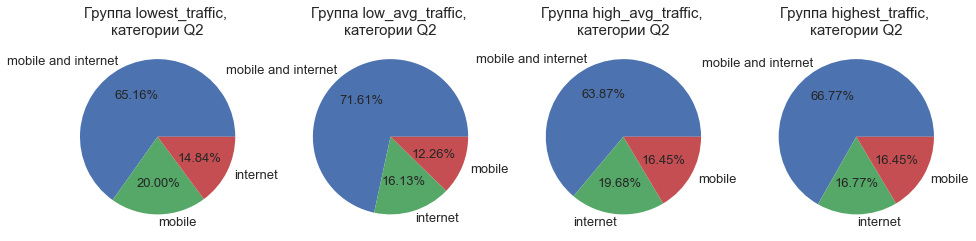

In [ ]:
df_w_ans = df[(df['Q2_cat'] != 'no answer')  # Нас интересуют группы респондентов 
    & (df['Q2_cat'] != 'other')              # давшие содержательный ответ в графе
    ]                                        # Q2

perc_25 = np.percentile(df_w_ans['Total Traffic(MB)'], 25)
perc_50 = np.percentile(df_w_ans['Total Traffic(MB)'], 50)
perc_75 = np.percentile(df_w_ans['Total Traffic(MB)'], 75)

lowest_traffic = df_w_ans[df_w_ans['Total Traffic(MB)'] <= perc_25\
    ]['Q2_cat'].value_counts()
    
low_avg_traffic = df_w_ans[(df_w_ans['Total Traffic(MB)'] > perc_25)\
    & (df['Total Traffic(MB)'] <= perc_50)\
    ]['Q2_cat'].value_counts()
    
high_avg_traffic = df_w_ans[(df_w_ans['Total Traffic(MB)'] > perc_50)\
    & (df['Total Traffic(MB)'] <= perc_75)\
    ]['Q2_cat'].value_counts()
    
highest_traffic = df_w_ans[df_w_ans['Total Traffic(MB)'] > perc_75\
    ]['Q2_cat'].value_counts()

fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 1)

axs[0].pie(lowest_traffic, 
           labels = lowest_traffic.index, 
           autopct = '%1.2f%%', 
            
           textprops = {'fontsize' : 13})

axs[1].pie(low_avg_traffic, 
           labels = low_avg_traffic.index, 
           autopct = '%1.2f%%', 
            
           textprops = {'fontsize' : 13})

axs[2].pie(high_avg_traffic, 
           labels = high_avg_traffic.index, 
           autopct = '%1.2f%%', 
            
           textprops = {'fontsize' : 13})

axs[3].pie(highest_traffic, 
           labels = highest_traffic.index, 
           autopct = '%1.2f%%', 
            
           textprops = {'fontsize' : 13})

axs[0].set_title('Группа lowest_traffic, \nкатегории Q2', fontsize = 15)

axs[1].set_title('Группа low_avg_traffic, \nкатегории Q2', fontsize = 15)

axs[2].set_title('Группа high_avg_traffic, \nкатегории Q2', fontsize = 15)

axs[3].set_title('Группа highest_traffic, \nкатегории Q2', fontsize = 15)
# plt.savefig("EDA_pie2_h3", bbox_inches='tight')
plt.show()

Похоже, что однородны также и распределения причин неудовлетворенности в группах величины суммарного трафика, для построения диаграмм выше создавалась выборка содержавшая только респондентов с причинами неудовлетворенности *mobile and internet, mobile, internet*.<br>
Наиболее распространенной причиной в четырех группах величины суммарного трафика является *mobile and internet*, но для целей текущего исследования будет более целесообразно исследовать две сопоставимые по численности группы *mobile* и *internet*:

In [ ]:
print('Респондентов указавших причину низкой оценки в графе Q1 - \
интернет:', len(df[df['Q2_cat'] == 'internet']))
print('Респондентов указавших причину низкой оценки в графе Q1 - \
мобильная связь:', len(df[df['Q2_cat'] == 'mobile']))
print('Респондентов указавших причину низкой оценки в графе Q1 - \
мобильная связь и интернет:', len(df[df['Q2_cat'] == 'mobile and internet']))

Респондентов указавших причину низкой оценки в графе Q1 - интернет: 209
Респондентов указавших причину низкой оценки в графе Q1 - мобильная связь: 202
Респондентов указавших причину низкой оценки в графе Q1 - мобильная связь и интернет: 829


Сформируем два датафрейма по признаку Q2_cat: из респондентов с причиной неудовлетворенности связью *internet* и респондентов с причиной неудовлетворенности связью *mobile* и исследуем их распределения показателей качества связи.

In [ ]:
df_mobile = df[df['Q2_cat'] == 'mobile']
df_internet = df[df['Q2_cat'] == 'internet']
len(df_mobile), len(df_internet)

(202, 209)

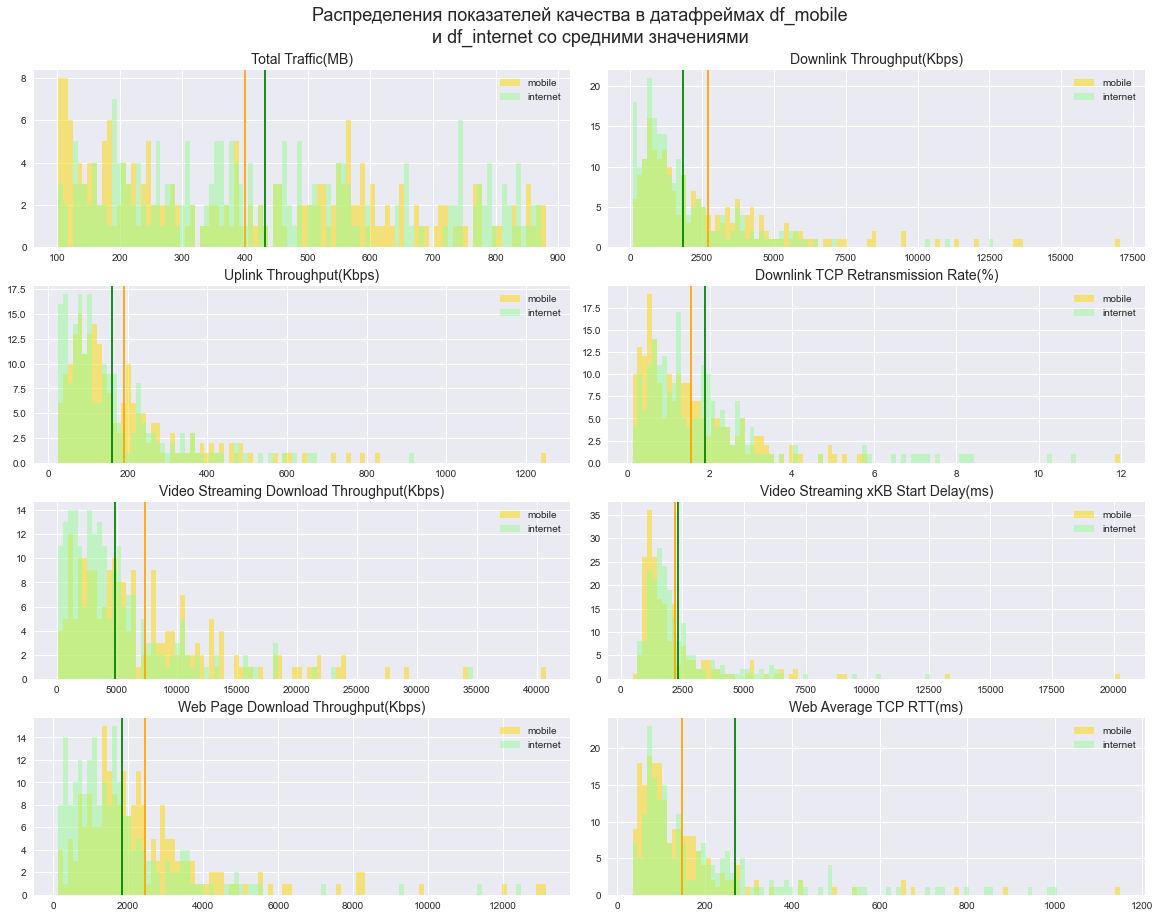

In [ ]:
feats = df_mobile.columns[3:-2].tolist()

fig, axs = plt.subplots(figsize = (16, 12), nrows = 4, ncols = 2, 
                        constrained_layout = True)

for ax, col in zip(axs.ravel(), feats):
    _, bins, _ = ax.hist(df_mobile[col], label = 'mobile', bins = 100, 
                         color = 'gold', alpha = 0.5)
    ax.hist(df_internet[col], bins = bins, label = 'internet', 
            color = 'palegreen', alpha = 0.5)
    ax.legend()
    ax.axvline(df_mobile[col].mean(), linestyle = '-', color = 'orange')
    ax.axvline(df_internet[col].mean(), linestyle = '-', color = 'green')
    ax.set_title(col, fontsize = 14)
# plt.savefig("EDA_final_h3", bbox_inches='tight')
fig.suptitle('Распределения показателей качества в датафреймах df_mobile\n\
    и df_internet со средними значениями', fontsize = 18, y = 1.05)
plt.show()

Визуализация различий распределений показателей качества связи в датафреймах df_mobile и df_internet демонстрирует наличие потенциально значимой разницы, которая требует более детального рассмотрения.<br><br>

Формулировка Гипотезы №3
### Гипотеза №3
**У респондентов указавших причину(ы) неудовлетворенности качеством связи в графе Q2 исходного датафрейма df относящиеся к категории 'internet' технические показатели ниже, чем у респондентов с категорией 'mobile'.**<br><br>

Поскольку данные текущего исследования включают технические показатели описаывающие качество мобильного интернета, сравнение двух вышеуказанных выборок будет производиться без учетов интересов группы с категорией 'mobile'.<br><br>

Проверка этой гипотезы укажет чувствительность аудитории к качеству двух основных составляющих сотовой связи: мобильный интернет и телефонная связь.

В исследовании **Гипотезы №3** примут участие показатели выделеные жирным шрифтом, в скобках указаны причины по которым параметр был исключен из анализа:

* Total Traffic(MB) (метод bootstrap не покажет разницы в среднем значении, данный показатель имеет равномерное распределение);
* **Downlink Throughput(Kbps)**;
* **Uplink Throughput(Kbps)**;
* **Downlink TCP Retransmission Rate(%)**;
* Video Streaming Download Throughput(Kbps) (скоррелированный с Downlink Throughput(Kbps));
* **Video Streaming xKB Start Delay(ms)**;
* **Web Page Download Throughput(Kbps)**;
* **Web Average TCP RTT(ms)**.

### Bootstrap
Поскольку для подтверждения гипотезы требуется наличие статистически значимой разницы между средними значениями двух выборок, а также с учетом того, что участвующие в исследовании выборки состоят из $\approx200$ элементов, в качестве метода проверки Гипотезы №3 будет использоваться метод *bootstrap* примененный к разностям средних значений показателей качества двух выборок.<br>

Для определения разницы составим выборки показателей в размере **100** объектов каждой из групп методом bootstrap, получим разность средних значений, и количеством шагов **n = 5000**, затем визуализируем распределения разностей показателей с помощью гистограмм. На гистограммах будут отмечены границы доверительных интервалов для нормального распределения соответствующие **уровню доверия 95%**.<br>

Производим необходимые инициации переменных, и запускаем цикл bootstrap по каждой колонке показателей качества для двух выборок, в результате будут получены 8 распределений разностей средних значений с количеством элементов n = 5000. Распределения будут визуализированы с помощью гистограмм с отмеченными границами доверительных интевалов, которые у нормального распределения соответствуют 2.5 и 97.5 перцентилям при уровне доверия 95%, что наглядно продемонстрирует наличие или отсутствие разницы у генеральных совокупностей.

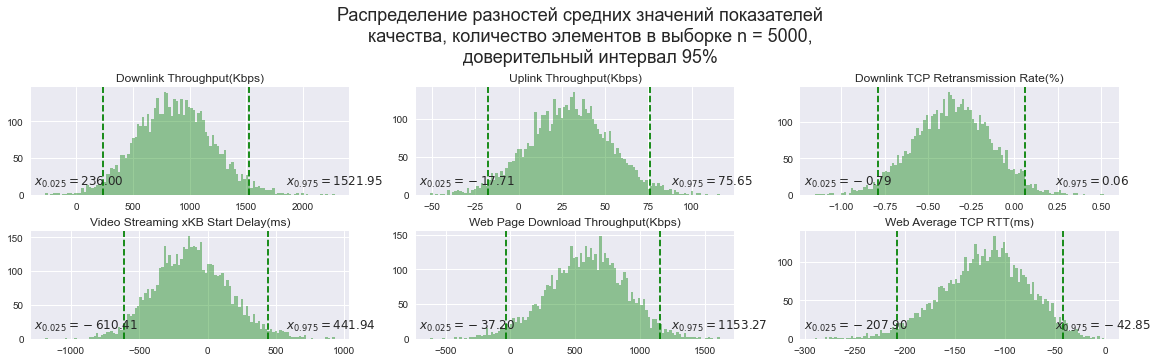

In [ ]:
feat_columns = [
    'Downlink Throughput(Kbps)',
    'Uplink Throughput(Kbps)', 
    'Downlink TCP Retransmission Rate(%)',
    'Video Streaming xKB Start Delay(ms)',
    'Web Page Download Throughput(Kbps)', 
    'Web Average TCP RTT(ms)'
]

h3_names = [
    'down_th',
    'up_th',
    'retr',
    'video_delay',
    'web_th',
    'ping'
]

for name in h3_names:
    globals()['h3_diff_' + name] = []

var_names = [
    h3_diff_down_th,
    h3_diff_up_th,
    h3_diff_retr,
    h3_diff_video_delay,
    h3_diff_web_th,
    h3_diff_ping
]
    
fig, axs = plt.subplots(figsize = (16, 4), nrows = 2, ncols = 3, 
    constrained_layout = True)

for ax, col, list_var in zip(axs.ravel(), feat_columns, var_names):
    
    """Каждое распределение разностей показателей будет содержать 3000 
    элементов.  Ниже формирование выборки из 100 показателей качества 
    для двух выборок и дополнение распределения разностью средних из 
    выборок выше."""
   
    for i in range(5000):
        intr = df_internet[col].sample(100, replace = True)
        mob = df_mobile[col].sample(100, replace = True)
        list_var.append(np.mean(mob) - np.mean(intr))

    ax.hist(list_var, bins = 120, color = 'g', alpha = 0.4)
    ax.set_title(col, fontsize = 12)
    ax.axvline(np.percentile(list_var, 2.5), 
        linestyle = '--', color = 'g')
    ax.axvline(np.percentile(list_var, 97.5), 
        linestyle = '--', color = 'g')
    
    ax.text(0.01, 0.05, r'$x_{0.025}=%.2f$' % (np.percentile(list_var, 2.5)),
        transform = ax.transAxes, fontsize = 12, verticalalignment = 'bottom')
    
    ax.text(0.80, 0.05, r'$x_{0.975}=%.2f$' % (np.percentile(list_var, 97.5)),
        transform = ax.transAxes, fontsize = 12, verticalalignment = 'bottom')
    
fig.suptitle('Распределение разностей средних значений показателей\n\
    качества, количество элементов в выборке n = 5000,\n\
    доверительный интервал 95%', fontsize = 18, y = 1.22)
# plt.savefig('bootstrap-h3', bbox_inches='tight')
plt.show()

Результаты метода *bootstrap* для разностей средних значений показателей качества датафреймов df_mobile и df_internet:

* Downlink Throughput(Kbps) - распределение показывает наличие разницы в среднем значении в пользу выборки df_mobile (скорость загрузки к абоненту выше);
* Uplink Throughput(Kbps) - отсутствие разницы, распределение содержит ноль в пределах доверительного интервала;
* Downlink TCP Retransmission Rate(%) - распределение содержит ноль вблизи границы доыверительного интервала, но большая часть распределения указывает на меньшую частоту переотправок в выборке df_mobile;
* Video Streaming xKB Start Delay(ms) - отсутствие разницы, распределение содержит ноль в пределах доверительного интервала;
* Web Page Download Throughput(Kbps) - распределение содержит ноль вблизи границы доыверительного интервала, но большая часть распределения указывает на более высокую скорость загрузки веб страниц в выборке df_mobile;
* Web Average TCP RTT(ms) - распределение показывает наличие разницы в среднем значении в пользу выборки df_mobile (пинг меньше).



## Заключение 
#### Гипотеза №3
**У респондентов указавших причину(ы) неудовлетворенности качеством связи в графе Q2 исходного датафрейма df относящиеся к категории 'internet' технические показатели ниже, чем у респондентов с категорией 'mobile'.** <br><br>

Проверка Гипотезы №3 методом *bootstrap* **не выявила** статистически значимой разницы между средними значениями показателей качества связи двух выборок **df_mobile** (выборка содержащая респондентов указавших причину(ы) неудовлетворенности качеством связи в графе Q2 относящиеся к категории 'mobile') и **df_internet** (выборка содержащая респондентов указавших причину(ы) неудовлетворенности качеством связи в графе Q2 относящиеся к категории 'internet') у 4-x из 6-ти показателей качества при **уровне доверия 95%.**<br><br>

Границы доверительных интервалов **4-x из 6-ти** распределений разностей средних содержат ноль, что не позволят сделать вывод о наличии статистически знаимой разницы значений.<br><br>
В результате проверки следует заключить, что Гипотеза №3 **не верна**. Это означает, что группа респондентов, указавших причину(ы) неудовлетворенности качеством связи в графе Q2 исходного датафрейма df относящиеся к категории 'internet' не обладает наихудшими техническими показателями качества связи. <br><br>

Возможно, это связано с тем, что распределения технических показателей качества различимы только при сравнении групп удовлетворенных и не удовлетворенных пользователей (Гипотеза №1) и однородны внутри группы неудовлетворенных пользователей, т.к. разделение на выборки по признаку Q2 (Гипотеза №2, Гипотеза №3) не выявило статистически значимой разницы у распределений, и, вероятно, опрошенные указывают причины своей неудовлетворенности качеством связи руководствуясь субъективными предпочтениями относительно составляющих сотовой связи (для кого-то важнее мобильный интернет, для кого-то мобильная связь), не смотря на то, что распределение суммарного трафика мобильного интернета не различалось ни при одном делении на выборки в рамках текущего исследования.

# Итоговые выводы
В ходе исследования были проверены 3 гипотезы связанные со сравнением технических показателей качества в группах удовлетворенных и неудовлетворенных пользователей **(Гипотеза №1)**, сравнением технических показателей качества в группе с наиболее популярными причинами недовольства связью и группе с менее популярными причинами **(Гипотеза №2)**, а также сравнением технических показателей качества в группах сформированных по категории недовольства качеством связи **(Гипотеза №3)**.<br><br>
В результате проведенного в рамках исследования анализа данных, а также проверки гипотез статистическими методами можно сделать следующие выводы:
* Исходная выборка демонстрирует значимые отличия в распределениях технических показателей только при разделении по ответам на первый вопрос **(Q1)**;
* Предложенные в опросе ответы на второй вопрос **(Q2)** различаются по популярности среди опрошенных, но не отличаются по распределениям технических показателей групп сформированных по ответам в графе Q2;
* Среди присутствующих в исходной таблице технических показателей нельзя выделить показатель выделяющийся по характеру распределения или по отличию в распределениях при проверки какой-либо из гипотез (за исключением суммарного трафика (Total Traffic(MB)), распределение показателя близко к равномерному при всех разделениях на подвыборки в данном исследовании).

Учитывая вышеизложенное заключим, что распределения технических показателей качества различимы только при сравнении групп удовлетворенных и нeудовлетворенных пользователей (Гипотеза №1) и однородны внутри группы неудовлетворенных пользователей (Гипотезы №2, №3 и анализ данных), разделение на выборки по признаку Q2 не выявило статистически значимой разницы у распределений, и, вероятно, опрошенные указывают причины своей неудовлетворенности качеством связи руководствуясь субъективными предпочтениями относительно составляющих сотовой связи.<br><br>
Это означает, что данные опроса разделяют всю совокупность текущих потребителей услуг компании «Мегафон» на две группы: удовлетворенные и неудовлетворенные ползователи.<br><br>
Исследование также выявило показатели качества вносящие вклад в оценку услуг потребителем (выделены жирным шрифтом, в скобочках указаны причины почему параметр не стоит относить к значимым показателям):
* Total Traffic(MB) - объем трафика передачи данных (распределение показателя близко к равномерному при всех разделениях на подвыборки в данном исследовании);
* **Downlink Throughput(Kbps)** - средняя скорость «к абоненту»;
* Uplink Throughput(Kbps) - средняя скорость «от абонента» (распределение не демонстрирует отличий при проверке гипотез);
* **Downlink TCP Retransmission Rate(%)** - частота переотправок пакетов «к абоненту»;
* Video Streaming Download Throughput(Kbps) - скорость загрузки потокового видео (параметр скоррелированный с Downlink Throughput(Kbps));
* **Video Streaming xKB Start Delay(ms)**;
* **Web Page Download Throughput(Kbps)**;
* **Web Average TCP RTT(ms)**.

В рамках анализа данных при проверке Гипотезы №2 исследовалась популярность вариантов ответов на вопрос Q2 в выборке недовольных пользователей, содержащей 1984 респондента. После чего проводилась группировка по категориям ответов и подсчет численности каждой категории.

| Вариант ответа  |Популярность варианта  | Категория | Численность категории   |
|-----------------|----------------------|----------|--------|
| 1 - недозвоны, обрывы при звонках                           | 648  | mobile                 |201  |
| 2 - время ожидания гудков при звонке                        | 184  | mobile                 |  |
| **3 - плохое качество связи в зданиях, торговых центрах, итп**  | **706**  | **mobile and internet**   |**763**   |
| 4 - медленный мобильный интернет                            | 626  |   internet             |200  |
| 5 - медленная загрузка видео                                | 222  | internet               |  |

В результате наиболее популярный ответ в графе Q2 это ответ **3**, наиболее многочисленная категория ответов - **mobile and internet** и две сопоставимые по численности категории **mobile** и **internet**. Для целей исследования использовались выборки сфомированные из категорий **mobile** и **internet**.<br><br>
Поскольку категорию **mobile and internet** формируют как комбинации ответов относящихся к категориям **mobile** и **internet** так и ответ **3** (который сам по себе является наиболее популярным вариантом ответа) можно заключить, что перефразирование варианта ответа **3**, придав ему более отчетливую принадлежность к категории, помогло бы избежать преобладания категории **mobile and internet** и распределить респондентов по более информативным категориям **mobile** и **internet**.<br><br>
Перефразирование варианта 3 может иметь форму разбиения данного варианта на 2 вопроса, например: 
1. Плохое качество мобильной связи в зданиях и торговых центрах;
2. Медленный мобильный интернет в зданиях и торговых центрах.